In [871]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
%matplotlib inline

In [872]:
def dateparse (time_in_secs):    
    return datetime.datetime.fromtimestamp(float(time_in_secs))

In [873]:
#Full data set
df = pd.read_csv('export_soffico_masterthesis.csv', sep=';', parse_dates=True,date_parser=dateparse)

#First Process Data Set
#df = pd.read_csv('export_soffico_masterthesis_2.csv', sep=';', parse_dates=True,date_parser=dateparse)

#Second Process Data Set
#df = pd.read_csv('export_soffico_masterthesis_203.csv', sep=';', parse_dates=True,date_parser=dateparse)

In [874]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182170 entries, 0 to 182169
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   PRS_START_TIME    182170 non-null  object
 1   PRS_END_TIME      182170 non-null  object
 2   PRS_STATE         182170 non-null  int64 
 3   PRS_BUSINESS_KEY  182170 non-null  object
dtypes: int64(1), object(3)
memory usage: 5.6+ MB


In [875]:
df.head()

PRS_START_TIME             PRS_END_TIME  PRS_STATE  \
0  2021-08-26 15:40:02.107  2021-08-26 15:40:02.123          3   
1  2021-08-26 15:40:02.107  2021-08-26 15:40:02.127          3   
2  2021-08-26 15:40:02.107  2021-08-26 15:40:02.123          3   
3  2021-08-26 15:40:02.107  2021-08-26 15:40:02.123          3   
4  2021-08-26 15:40:02.107  2021-08-26 15:40:02.127          3   

                                    PRS_BUSINESS_KEY  
0  nodevalue: 45.090816, nodename: TempIR_FStr_Li...  
1  nodevalue: 73.53187, nodename: TempIR_LStr_Lin...  
2  nodevalue: 48.19205, nodename: TempIR_FStr_Lin...  
3  nodevalue: 48.377716, nodename: TempIR_FStr_Li...  
4  nodevalue: 53.852966, nodename: TempIR_FStr_Li...

In [876]:
df = df.join(df['PRS_BUSINESS_KEY'].str.split(', ', 2, expand=True).rename( 
    columns={0:'nodevalue', 1:'nodename', 2:'sourcetimestamp'}))



In [877]:
df.head()

PRS_START_TIME             PRS_END_TIME  PRS_STATE  \
0  2021-08-26 15:40:02.107  2021-08-26 15:40:02.123          3   
1  2021-08-26 15:40:02.107  2021-08-26 15:40:02.127          3   
2  2021-08-26 15:40:02.107  2021-08-26 15:40:02.123          3   
3  2021-08-26 15:40:02.107  2021-08-26 15:40:02.123          3   
4  2021-08-26 15:40:02.107  2021-08-26 15:40:02.127          3   

                                    PRS_BUSINESS_KEY             nodevalue  \
0  nodevalue: 45.090816, nodename: TempIR_FStr_Li...  nodevalue: 45.090816   
1  nodevalue: 73.53187, nodename: TempIR_LStr_Lin...   nodevalue: 73.53187   
2  nodevalue: 48.19205, nodename: TempIR_FStr_Lin...   nodevalue: 48.19205   
3  nodevalue: 48.377716, nodename: TempIR_FStr_Li...  nodevalue: 48.377716   
4  nodevalue: 53.852966, nodename: TempIR_FStr_Li...  nodevalue: 53.852966   

                       nodename                            sourcetimestamp  
0  nodename: TempIR_FStr_Linie4  sourcetimestamp: 2021-08-26T13:39:57.252Z  
1  nodename: TempIR_LStr_Linie3  sourcetimestamp: 2021-08-26T13:39:57.252Z  
2  nodename: TempIR_FStr_Linie1  sourcetimestamp: 2021-08-26T13:39:57.251Z  
3  nodename: TempIR_FStr_Linie3  sourcetimestamp: 2021-08-26T13:39:57.252Z  
4  nodename: TempIR_FStr_Linie2  sourcetimestamp: 2021-08-26T13:39:57.251Z

In [878]:
#split columns
#df = df.join(df['PRS_BUSINESS_KEY'].str.split(', ', 2, expand=True).rename(columns={0:'nodevalue', 1:'nodename', 2:'sourcetimestamp'}))

#correct column content
df["nodevalue"] = df['nodevalue'].str.replace('nodevalue: ', '')
df["nodevalue"] = df['nodevalue'].str.replace('true', '-1')
df["nodevalue"] = df['nodevalue'].str.replace('false', '-2')
df["nodevalue"] = pd.to_numeric(df["nodevalue"], downcast="float")

df["nodename"] = df['nodename'].str.replace('nodename: ', '')

df["sourcetimestamp"] = df['sourcetimestamp'].str.replace('sourcetimestamp: ', '')
df["sourcetimestamp"] = df['sourcetimestamp'].str.replace('T', ' ')
df["sourcetimestamp"] = df['sourcetimestamp'].str.replace('Z', '')
df["sourcetimestamp"] = pd.to_datetime(df["sourcetimestamp"])

df = df.drop("PRS_BUSINESS_KEY", axis=1)
df = df.drop("PRS_STATE", axis=1)

df.head()

PRS_START_TIME             PRS_END_TIME  nodevalue  \
0  2021-08-26 15:40:02.107  2021-08-26 15:40:02.123  45.090816   
1  2021-08-26 15:40:02.107  2021-08-26 15:40:02.127  73.531868   
2  2021-08-26 15:40:02.107  2021-08-26 15:40:02.123  48.192051   
3  2021-08-26 15:40:02.107  2021-08-26 15:40:02.123  48.377716   
4  2021-08-26 15:40:02.107  2021-08-26 15:40:02.127  53.852966   

             nodename         sourcetimestamp  
0  TempIR_FStr_Linie4 2021-08-26 13:39:57.252  
1  TempIR_LStr_Linie3 2021-08-26 13:39:57.252  
2  TempIR_FStr_Linie1 2021-08-26 13:39:57.251  
3  TempIR_FStr_Linie3 2021-08-26 13:39:57.252  
4  TempIR_FStr_Linie2 2021-08-26 13:39:57.251

In [879]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182170 entries, 0 to 182169
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   PRS_START_TIME   182170 non-null  object        
 1   PRS_END_TIME     182170 non-null  object        
 2   nodevalue        182170 non-null  float32       
 3   nodename         182170 non-null  object        
 4   sourcetimestamp  182170 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float32(1), object(3)
memory usage: 6.3+ MB


In [880]:
df["PRS_START_TIME"] = pd.to_datetime(df["PRS_START_TIME"])

In [881]:
df["PRS_END_TIME"] = pd.to_datetime(df["PRS_END_TIME"])

In [882]:
df['processtime'] = df['PRS_END_TIME'] - df['PRS_START_TIME']
df['processtime']=df['processtime']/np.timedelta64(1,'ms')

#sourcetimestamp ist UTC, PRS START TIME ist Local
#max 1 sec abweichung

df.head()

PRS_START_TIME            PRS_END_TIME  nodevalue  \
0 2021-08-26 15:40:02.107 2021-08-26 15:40:02.123  45.090816   
1 2021-08-26 15:40:02.107 2021-08-26 15:40:02.127  73.531868   
2 2021-08-26 15:40:02.107 2021-08-26 15:40:02.123  48.192051   
3 2021-08-26 15:40:02.107 2021-08-26 15:40:02.123  48.377716   
4 2021-08-26 15:40:02.107 2021-08-26 15:40:02.127  53.852966   

             nodename         sourcetimestamp  processtime  
0  TempIR_FStr_Linie4 2021-08-26 13:39:57.252         16.0  
1  TempIR_LStr_Linie3 2021-08-26 13:39:57.252         20.0  
2  TempIR_FStr_Linie1 2021-08-26 13:39:57.251         16.0  
3  TempIR_FStr_Linie3 2021-08-26 13:39:57.252         16.0  
4  TempIR_FStr_Linie2 2021-08-26 13:39:57.251         20.0

In [883]:
column = df["processtime"]

max_value_nodevalue = df['nodevalue'].nlargest(10)
max_value_processtime = df['processtime'].nlargest(10)
print(max_value_nodevalue)
print(max_value_processtime)

5159      2.000000e+37
5163      2.000000e+37
19122     2.000000e+37
44041     2.000000e+37
59128     2.000000e+37
9613      1.979217e+02
181879    1.968238e+02
56881     1.951583e+02
181875    1.948264e+02
19215     1.947507e+02
Name: nodevalue, dtype: float32
35688     5010.0
43491     5010.0
114905     500.0
5423       456.0
5425       450.0
29826      390.0
31612      360.0
31614      360.0
29829      350.0
29819      347.0
Name: processtime, dtype: float64


In [884]:
#Drop outliers of full data set
df = df.drop(5159, axis=0)
df = df.drop(5163, axis=0)
df = df.drop(19122, axis=0)
df = df.drop(44041, axis=0)
df = df.drop(59128, axis=0)
df = df.drop(35688, axis=0)
df = df.drop(114905, axis=0)
df = df.drop(43491, axis=0)

max_value_nodevalue = df['nodevalue'].nlargest(10)
max_value_processtime = df['processtime'].nlargest(10)
print(max_value_nodevalue)
print(max_value_processtime)

9613      197.921692
181879    196.823761
56881     195.158295
181875    194.826385
19215     194.750717
42324     194.414154
42320     194.130615
178267    193.748917
174422    193.500641
169410    193.113251
Name: nodevalue, dtype: float32
5423      456.0
5425      450.0
29826     390.0
31612     360.0
31614     360.0
29829     350.0
29819     347.0
155142    336.0
155152    336.0
29816     333.0
Name: processtime, dtype: float64


In [885]:
dummies = pd.get_dummies(df['nodename'], drop_first=True)
df = pd.concat([df.drop('nodename', axis=1), dummies], axis=1)

In [886]:
df.head()

PRS_START_TIME            PRS_END_TIME  nodevalue  \
0 2021-08-26 15:40:02.107 2021-08-26 15:40:02.123  45.090816   
1 2021-08-26 15:40:02.107 2021-08-26 15:40:02.127  73.531868   
2 2021-08-26 15:40:02.107 2021-08-26 15:40:02.123  48.192051   
3 2021-08-26 15:40:02.107 2021-08-26 15:40:02.123  48.377716   
4 2021-08-26 15:40:02.107 2021-08-26 15:40:02.127  53.852966   

          sourcetimestamp  processtime  Handbetrieb  Produktion  Stoerung  \
0 2021-08-26 13:39:57.252         16.0            0           0         0   
1 2021-08-26 13:39:57.252         20.0            0           0         0   
2 2021-08-26 13:39:57.251         16.0            0           0         0   
3 2021-08-26 13:39:57.252         16.0            0           0         0   
4 2021-08-26 13:39:57.251         20.0            0           0         0   

   TempIR_FStr_Linie1  TempIR_FStr_Linie2  TempIR_FStr_Linie3  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   1                   0                   0   
3                   0                   0                   1   
4                   0                   1                   0   

   TempIR_FStr_Linie4  TempIR_LStr_Linie1  TempIR_LStr_Linie2  \
0                   1                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   TempIR_LStr_Linie3  TempIR_LStr_Linie4  
0                   0                   0  
1                   1                   0  
2                   0                   0  
3                   0                   0  
4                   0                   0

In [887]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182162 entries, 0 to 182169
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   PRS_START_TIME      182162 non-null  datetime64[ns]
 1   PRS_END_TIME        182162 non-null  datetime64[ns]
 2   nodevalue           182162 non-null  float32       
 3   sourcetimestamp     182162 non-null  datetime64[ns]
 4   processtime         182162 non-null  float64       
 5   Handbetrieb         182162 non-null  uint8         
 6   Produktion          182162 non-null  uint8         
 7   Stoerung            182162 non-null  uint8         
 8   TempIR_FStr_Linie1  182162 non-null  uint8         
 9   TempIR_FStr_Linie2  182162 non-null  uint8         
 10  TempIR_FStr_Linie3  182162 non-null  uint8         
 11  TempIR_FStr_Linie4  182162 non-null  uint8         
 12  TempIR_LStr_Linie1  182162 non-null  uint8         
 13  TempIR_LStr_Linie2  182162 no

In [888]:
df.head()

PRS_START_TIME            PRS_END_TIME  nodevalue  \
0 2021-08-26 15:40:02.107 2021-08-26 15:40:02.123  45.090816   
1 2021-08-26 15:40:02.107 2021-08-26 15:40:02.127  73.531868   
2 2021-08-26 15:40:02.107 2021-08-26 15:40:02.123  48.192051   
3 2021-08-26 15:40:02.107 2021-08-26 15:40:02.123  48.377716   
4 2021-08-26 15:40:02.107 2021-08-26 15:40:02.127  53.852966   

          sourcetimestamp  processtime  Handbetrieb  Produktion  Stoerung  \
0 2021-08-26 13:39:57.252         16.0            0           0         0   
1 2021-08-26 13:39:57.252         20.0            0           0         0   
2 2021-08-26 13:39:57.251         16.0            0           0         0   
3 2021-08-26 13:39:57.252         16.0            0           0         0   
4 2021-08-26 13:39:57.251         20.0            0           0         0   

   TempIR_FStr_Linie1  TempIR_FStr_Linie2  TempIR_FStr_Linie3  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   1                   0                   0   
3                   0                   0                   1   
4                   0                   1                   0   

   TempIR_FStr_Linie4  TempIR_LStr_Linie1  TempIR_LStr_Linie2  \
0                   1                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   TempIR_LStr_Linie3  TempIR_LStr_Linie4  
0                   0                   0  
1                   1                   0  
2                   0                   0  
3                   0                   0  
4                   0                   0

In [889]:
df = df.reset_index(drop=True)
print(df.loc[[5159]])

              PRS_START_TIME            PRS_END_TIME   nodevalue  \
5159 2021-08-26 16:06:45.250 2021-08-26 16:06:45.277  147.161896   

             sourcetimestamp  processtime  Handbetrieb  Produktion  Stoerung  \
5159 2021-08-26 14:06:42.261         27.0            0           0         0   

      TempIR_FStr_Linie1  TempIR_FStr_Linie2  TempIR_FStr_Linie3  \
5159                   0                   1                   0   

      TempIR_FStr_Linie4  TempIR_LStr_Linie1  TempIR_LStr_Linie2  \
5159                   0                   0                   0   

      TempIR_LStr_Linie3  TempIR_LStr_Linie4  
5159                   0                   0  


In [890]:
df2 = df[['nodevalue', 'processtime']].copy()

contamination = 0.001

model = IsolationForest(contamination=contamination, n_estimators=1000)
model.fit(df2)

df2["iForest"] = pd.Series(model.predict(df2))
df2["iForest"] = df2["iForest"].map({1: 0, -1: 1})
print(df2["iForest"].value_counts())



0    181979
1       183
Name: iForest, dtype: int64


In [891]:
183 / 181980

0.0010056050115397296

In [892]:
print(df2.loc[[5159]])

       nodevalue  processtime  iForest
5159  147.161896         27.0        0


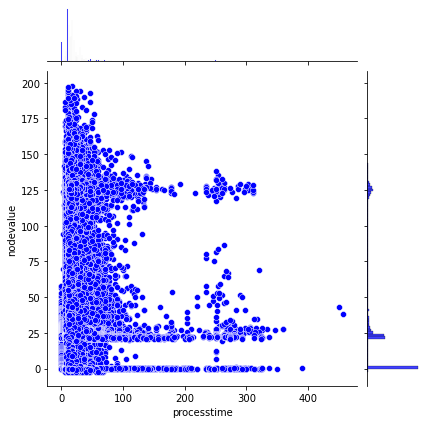

In [893]:
sns.jointplot(x='processtime',y='nodevalue',data=df2,color='blue')

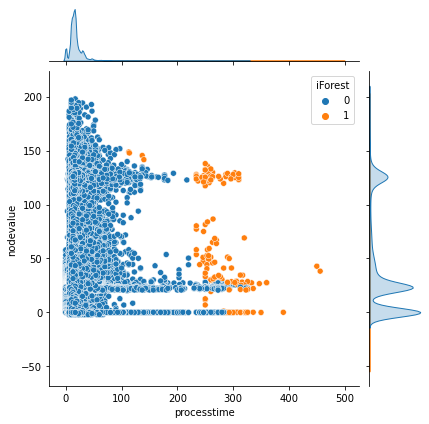

In [894]:
sns.jointplot(x='processtime',y='nodevalue',data=df2,color='blue', hue="iForest")

<Figure size 792x504 with 0 Axes>

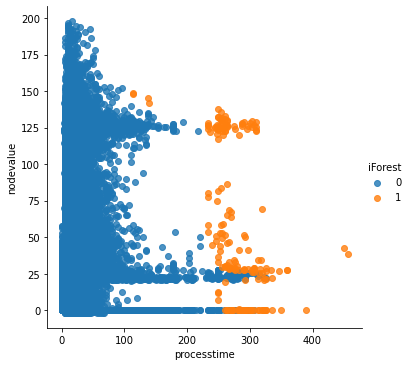

In [895]:
plt.figure(figsize=(11,7))
sns.lmplot(y='nodevalue',x='processtime',data=df2,hue='iForest',scatter=True, fit_reg=False)

In [896]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182162 entries, 0 to 182161
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   PRS_START_TIME      182162 non-null  datetime64[ns]
 1   PRS_END_TIME        182162 non-null  datetime64[ns]
 2   nodevalue           182162 non-null  float32       
 3   sourcetimestamp     182162 non-null  datetime64[ns]
 4   processtime         182162 non-null  float64       
 5   Handbetrieb         182162 non-null  uint8         
 6   Produktion          182162 non-null  uint8         
 7   Stoerung            182162 non-null  uint8         
 8   TempIR_FStr_Linie1  182162 non-null  uint8         
 9   TempIR_FStr_Linie2  182162 non-null  uint8         
 10  TempIR_FStr_Linie3  182162 non-null  uint8         
 11  TempIR_FStr_Linie4  182162 non-null  uint8         
 12  TempIR_LStr_Linie1  182162 non-null  uint8         
 13  TempIR_LStr_Linie2  182162 no

<AxesSubplot:>

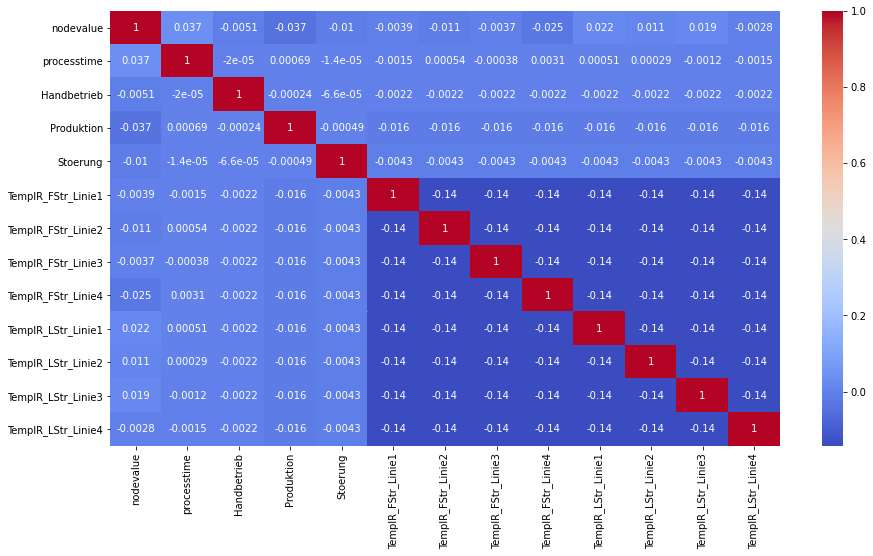

In [897]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [898]:
#time delta of internal time stamp and Orchestra time stamp

df2 = df
#correct sourcetimestamp by 2 hours, due to UTC - local time difference
df2["timedelta"] = df['PRS_START_TIME'] - (df['sourcetimestamp'] + datetime.timedelta(hours=2))
df2["timedelta"] = df2['timedelta']/np.timedelta64(1,'s')

max_value_timedelta = df2['timedelta'].nlargest(10)
print(str(max_value_timedelta) + "sec")

print("\t-----------------------------------------")
print("timedelta average in s (mean): " + str(df2["timedelta"].mean()))
print("timedelta average in s (median): " + str(df2["timedelta"].median()))


64825    10.987
64830    10.984
64834    10.979
64831    10.977
64833    10.977
64827    10.976
64828    10.974
64823    10.973
64835    10.973
64832    10.972
Name: timedelta, dtype: float64sec
	-----------------------------------------
timedelta average in s (mean): 2.5131601980654894
timedelta average in s (median): 2.5


In [899]:
df2.head()

PRS_START_TIME            PRS_END_TIME  nodevalue  \
0 2021-08-26 15:40:02.107 2021-08-26 15:40:02.123  45.090816   
1 2021-08-26 15:40:02.107 2021-08-26 15:40:02.127  73.531868   
2 2021-08-26 15:40:02.107 2021-08-26 15:40:02.123  48.192051   
3 2021-08-26 15:40:02.107 2021-08-26 15:40:02.123  48.377716   
4 2021-08-26 15:40:02.107 2021-08-26 15:40:02.127  53.852966   

          sourcetimestamp  processtime  Handbetrieb  Produktion  Stoerung  \
0 2021-08-26 13:39:57.252         16.0            0           0         0   
1 2021-08-26 13:39:57.252         20.0            0           0         0   
2 2021-08-26 13:39:57.251         16.0            0           0         0   
3 2021-08-26 13:39:57.252         16.0            0           0         0   
4 2021-08-26 13:39:57.251         20.0            0           0         0   

   TempIR_FStr_Linie1  TempIR_FStr_Linie2  TempIR_FStr_Linie3  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   1                   0                   0   
3                   0                   0                   1   
4                   0                   1                   0   

   TempIR_FStr_Linie4  TempIR_LStr_Linie1  TempIR_LStr_Linie2  \
0                   1                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   TempIR_LStr_Linie3  TempIR_LStr_Linie4  timedelta  
0                   0                   0      4.855  
1                   1                   0      4.855  
2                   0                   0      4.856  
3                   0                   0      4.855  
4                   0                   0      4.856

In [900]:
#Stoerung analysis
#df1, df2 = [x for _, x in df.groupby(df['Sales'] < 30)]

df3 = df2[['Produktion', 'TempIR_LStr_Linie4']].copy()
df_temp = df2[['nodevalue']].copy()
df_temp['index'] = df_temp.index


df3 = df3.loc[~(df3==0).all(axis=1)]
df3['index'] = df3.index

df3=df3.merge(df_temp, on='index', how='left') 

df3 = df3.drop('index', axis=1)
df3 = df3.reset_index(drop=True)
df3['index'] = df3.index

df3['ProduktionStatus'] = df3['nodevalue']
df3.loc[(df3['ProduktionStatus'] > -1),'ProduktionStatus']=0
df3.loc[(df3['nodevalue'] == -1),'nodevalue']=-1
df3.loc[(df3['nodevalue'] == -2),'nodevalue']=100

df3.loc[(df3['ProduktionStatus'] == -1),'ProduktionStatus']=150
df3.loc[(df3['ProduktionStatus'] == -2),'ProduktionStatus']=200

print(df3['Produktion'].value_counts())
print(df3['nodevalue'].value_counts())
print(df3['ProduktionStatus'].value_counts())

#df4 = df2[['Produktion']].copy()
#df3 = df3[df3['TempIR_FStr_Linie1'] != 0]
#df3 = pd.concat([df3[df3['TempIR_FStr_Linie1'] != 0], df4], axis=1)
#df3 = df3.reset_index(drop=True)
#df3['index'] = df3.index

print(len(df3.index))
df3.head(10)

0    22725
1      325
Name: Produktion, dtype: int64
-1.000000      163
 100.000000    162
 22.541332       2
 21.325428       2
 21.811687       2
              ... 
 0.036376        1
 0.035925        1
 22.211430       1
 49.597637       1
 77.522011       1
Name: nodevalue, Length: 22671, dtype: int64
0.0      22725
150.0      163
200.0      162
Name: ProduktionStatus, dtype: int64
23050


Produktion  TempIR_LStr_Linie4   nodevalue  index  ProduktionStatus
0           0                   1   73.446571      0               0.0
1           0                   1  129.057892      1               0.0
2           0                   1   72.801476      2               0.0
3           0                   1  125.982216      3               0.0
4           0                   1   70.800888      4               0.0
5           0                   1  124.483032      5               0.0
6           0                   1   69.399864      6               0.0
7           0                   1  124.049370      7               0.0
8           0                   1   68.469269      8               0.0
9           0                   1  124.110252      9               0.0

<Figure size 792x504 with 0 Axes>

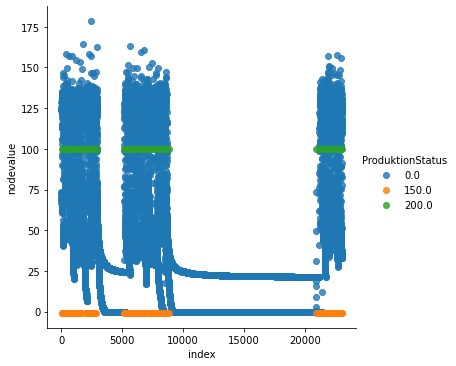

In [901]:
plt.figure(figsize=(11,7))
sns.lmplot(y='nodevalue',x='index',data=df3,hue='ProduktionStatus',scatter=True, fit_reg=False)

In [902]:
lastNodevalue = 0
lastProduktionState = 0

for index, row in df3.iterrows():
    if lastProduktionState == -5:
        if (row['nodevalue'] > (lastNodevalue) and lastNodevalue > 0):
            print("alert: " + str(lastProduktionState) + " + lastNode: " + str(lastNodevalue) + " - currentNode: " + str(row['nodevalue']) + " at index: " + str(row['index']))
    
    if row['ProduktionStatus'] != 0:
        lastProduktionState = row['ProduktionStatus']
    lastNodevalue = row['nodevalue']
    #print(currentProduktionState, currentNodevalue)

In [903]:
if False:
    !pip install plotly
    !pip install cufflinks

In [904]:
import plotly.express as px
df = px.data.tips()
fig = px.scatter(df3, y="nodevalue", x="index", color="ProduktionStatus")
fig.show()


In [905]:
import cufflinks as cf
cf.set_config_file(sharing='public',theme='pearl',offline=False)
cf.go_offline()

df3[['nodevalue', 'ProduktionStatus']].iplot(kind='scatter',xTitle='index',yTitle='nodevalue',title='Production Temperature Course')